### EDA

- gender 성별
- age 나이
- height 키
- weight 몸무게
- eyesight(left, right) 왼쪽 시력, 오른쪽 시력
- hearing(left, right) 왼쪽 청력, 오른쪽 청력

- systolic 최고혈압(대동맥 내로 보내지는 심실 수축기의 혈압)
- relaxation 최저혈압
- fasting blood sugar 공복혈당
- Cholesterol 총 콜레스테롤
- triglyceride 중성지방
- HDL 고밀도지단백 (콜레스테롤)
- LDL 저밀도지단백 (콜레스테롤)
- hemoglobin 헤모글로빈 수치
- Urine protein 단백뇨
- serum creatinine 혈액 또는 소변에서 크레아티닌 양 측정 - *신장*관련

- AST 아스파르테이트 아미노 전달효소 *간*
- ALT 알라닌 아미노 전달효소 *간* 
    - AST, ALT의 정상 범위 ~40, 경도 40~ 200, 중등도 200~400, 중증 400~
- Gtp 감마 Gtp간 기능 검사 *알코올 관련*
    - 정상 ~50, 가벼운 증가 51~100, 중간정도의 증가 101~200, 고도의 증가 201~500, 초고도 증가 500~
    - 술 마시지 않는 사람도 높게 나올 수 있다.
    
- oral 구강검사 여부
- dental caries 충치 갯수
- tartar 치석존재여부

In [1]:
from sklearn import metrics

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
df = pd.read_csv('C:/ds_work/ML_DATA/smoking.csv')
df.shape  # (55693, 27)

(55692, 27)

In [4]:
# 범주형 데이터 변환
df = df.replace({'N':0,'Y':1,'F':0,'M':1, })
gender = {'F': 0, 'M': 1}
oral = {'N': 0, 'T': 1}
tartar = {'N': 0, 'T': 1}
# df 전체 float형으로 바꾸기
df = df.astype(float)

In [5]:
target = df.loc[:, 'smoking']
#target
df_li = df.iloc[:, 10:18]
#df_li
df_bl = df.iloc[:, 20:23]
#df_bl
li_bl = pd.concat([df_li,df_bl],axis=1)
#li_bl
df = pd.concat([li_bl,target],axis=1)
df

,systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,AST,ALT,Gtp,smoking
0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,18.0,19.0,27.0,0.0
1,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,22.0,19.0,18.0,0.0
2,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,21.0,16.0,22.0,1.0
3,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,19.0,26.0,18.0,0.0
4,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,16.0,14.0,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
55687,110.0,68.0,89.0,213.0,99.0,75.0,118.0,12.3,14.0,7.0,10.0,0.0
55688,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0,20.0,12.0,14.0,0.0
55689,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4,17.0,11.0,12.0,0.0
55690,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4,20.0,19.0,18.0,0.0


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=42)

In [17]:
#### RobustScaler적용 ####

from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()

X_train = rbs.fit_transform(X_train)
X_test = rbs.transform(X_test)

### 3. 훈련01

In [7]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

print("x_train_std mean : ",X_train.mean())
print("x_train_std std: ",X_train.std())

print("x_test_std mean: ",X_test.mean())
print("x_test_std std: ",X_test.std())

x_train_std mean :  9.879220869667633e-17
x_train_std std:  1.0
x_test_std mean:  0.0006574639658312238
x_test_std std:  0.9622086564307376


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

from MyModule import girdcvconv as gc


estimator = DecisionTreeClassifier()

criterion_list =  ['gini','entropy'] 
splitter_list =  ['best','random']
max_depth_list =  np.arange(2, 20)
min_samples_split_list = np.arange(2, 20)                                   # 노드 분할 위한 최소 표본수 작으면 과적합, 반대의 경우 과소적합
min_weight_fraction_leaf_list =  np.append(0.0,np.arange(0.1, 0.5, 0.1))    # 비율 커지면 과대적합 줄어듬 0,5보다 작게 해야한다
min_impurity_decrease_list = np.append(0.0,np.arange(0.3, 0.5, 0.1))        # 비율 노드분할 관련

parameter={
    'criterion' : criterion_list ,
    'splitter'  : splitter_list,
    'max_depth' : max_depth_list,
    'min_samples_split' : min_samples_split_list,
    'min_weight_fraction_leaf' : min_weight_fraction_leaf_list,    
    'min_impurity_decrease' :min_impurity_decrease_list,
    'random_state': [42]
}

model = GridSearchCV(estimator, param_grid=parameter, cv=3, verbose=1, n_jobs=-1, refit=True)
# verbose 출력 실행 모듈
model.fit(X_train,y_train)

print('best_params : ', model.best_params_)
print('best_score_ : ', model.best_score_)

gc.paramsTocsv(data_name='bloodliver', scaler='StandardScaler', model_name='DecisionTreeClassifier', best_params=model.best_params_, best_score=model.best_score_)

Fitting 3 folds for each of 19440 candidates, totalling 58320 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_impurity_decrease': array([0. , 0.3, 0.4]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_weight_fraction_leaf': array([0. , 0.1, 0.2, 0.3, 0.4]),
                         'random_state': [42], 'splitter': ['best', 'random']},
             verbose=1)

best_params :  {'criterion': 'gini', 'max_depth': 14, 'min_impurity_decrease': 0.0, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
best_score_ :  0.7212533387201759


In [7]:
## 예시
# from MyModule import girdcvconv as gc
# best_params =  {'criterion': 'gini', 'max_depth': 19, 'min_impurity_decrease': 0.0, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
# best_score_ =  0.7113550153749467
# gc.paramsTocsv(data_name='obesity', scaler='StandardScaler', model_name='DecisionTreeClassifier', best_params=best_params, best_score=best_score_)

In [11]:
# 생성된 dataframe 확인
import pandas as pd
df = pd.read_csv('C:/ds_work/source_code/modeldata/bloodliver.csv')
df

,date,best_score,criterion,max_depth,min_impurity_decrease,min_samples_split,min_weight_fraction_leaf,random_state,splitter,test,model_name,scaler
0,2022-11-21 13:32:52,0.800000,entropy,8,0.0,2,0.0,42,best,123.0,NaN,NaN
1,2022-11-21 13:56:47,0.721253,gini,14,0.0,2,0.0,42,best,NaN,DecisionTreeClassifier,StandardScaler


In [ ]:
# 특정 데이터프레임 선택
import pandas as pd
from MyModule import selectparameter as sp

bestparams = sp.selectparam('obesity',0)
print(bestparams)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [19],
                         'min_impurity_decrease': [0.0],
                         'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'random_state': [42], 'splitter': ['best']},
             verbose=1)

confusion_matrix : 
 [[5510 1517]
 [1423 2689]]


<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

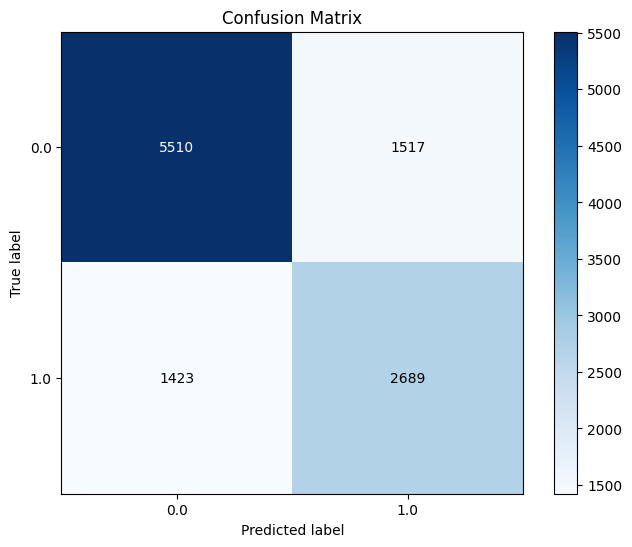

리포트:
               precision    recall  f1-score   support

         0.0       0.79      0.78      0.79      7027
         1.0       0.64      0.65      0.65      4112

    accuracy                           0.74     11139
   macro avg       0.72      0.72      0.72     11139
weighted avg       0.74      0.74      0.74     11139



In [12]:
#DecisionTreeClassifier 최적의 파라미터를 바로 삽입 : 30%
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier()
model = GridSearchCV(estimator, param_grid=bestparams, cv=3, verbose=1, n_jobs=-1, refit=True)
# verbose 출력 실행 모듈
model.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

#### RandomForestClassifier



RandomForestClassifier()

1.0

**********


0.80599694766137

confusion_matrix : 
 [[6085  942]
 [1219 2893]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

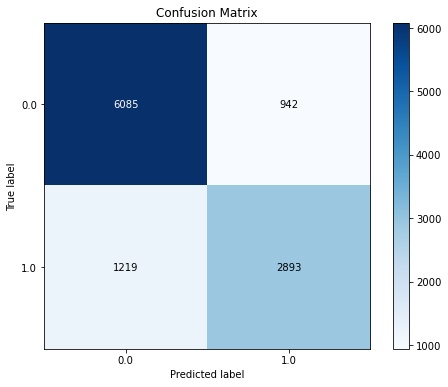

리포트:
               precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      7027
         1.0       0.75      0.70      0.73      4112

    accuracy                           0.81     11139
   macro avg       0.79      0.78      0.79     11139
weighted avg       0.80      0.81      0.80     11139



In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train,y_train)

pred = model.predict(X_train)
accuracy_score(y_train,pred)
print("*"*10)
pred_test = model.predict(X_test)
accuracy_score(y_test,pred_test)

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

In [9]:
from sklearn.model_selection import GridSearchCV

from MyModule import girdcvconv as gc

estimator = RandomForestClassifier()

#n_estimators_list = np.arange(100,110)
criterion_list =  ['gini','entropy','lob_loss'] 
#splitter_list =  ['best','random']
#max_depth_list =  np.arange(10, 15)
max_features_list = ['auto', 'sqrt', 'log2']
min_samples_split_list = np.arange(2, 20)                                   # 노드 분할 위한 최소 표본수 작으면 과적합, 반대의 경우 과소적합
min_weight_fraction_leaf_list =  np.append(0.0,np.arange(0.1, 0.5, 0.1))    # 비율 커지면 과대적합 줄어듬 0,5보다 작게 해야한다
min_impurity_decrease_list = np.append(0.0,np.arange(0.3, 0.5, 0.1))        # 비율 노드분할 관련

parameter={
    'criterion' : criterion_list ,
    'max_features' : max_features_list,
    
    'min_samples_split' : min_samples_split_list,
    'min_weight_fraction_leaf' : min_weight_fraction_leaf_list,    
    'min_impurity_decrease' :min_impurity_decrease_list,
    'random_state':[42]

}

model = GridSearchCV(estimator, param_grid=parameter, cv=3, verbose=1, n_jobs=-1, refit=True)
# verbose 출력 실행 모듈
model.fit(X_train,y_train)

print('best_params : ', model.best_params_)
print('best_score_ : ', model.best_score_)

gc.paramsTocsv(data_name='bloodliver', scaler='StandardScaler', model_name='RandomForestClassifierr', best_params=model.best_params_, best_score=model.best_score_)

Fitting 3 folds for each of 2430 candidates, totalling 7290 fits


KeyboardInterrupt: 

In [10]:
# 생성된 dataframe 확인
import pandas as pd
df = pd.read_csv('C:/ds_work/source_code/modeldata/bloodliver.csv')
df

,date,best_score,criterion,max_depth,min_impurity_decrease,min_samples_split,min_weight_fraction_leaf,random_state,splitter,test,model_name,scaler,max_features,class_weight,penalty,solver,gamma,kernel
0,2022-11-21 13:32,0.800000,entropy,8.0,0.0,2.0,0.0,42,best,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-11-21 13:56,0.721253,gini,14.0,0.0,2.0,0.0,42,best,NaN,DecisionTreeClassifier,StandardScaler,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-11-21 16:21,0.786928,entropy,NaN,0.0,5.0,0.0,42,NaN,NaN,RandomForestClassifierr,StandardScaler,auto,NaN,NaN,NaN,NaN,NaN
3,2022-11-21 16:49,0.711579,NaN,NaN,NaN,NaN,NaN,42,NaN,NaN,LogisticRegression,StandardScaler,NaN,balanced,l2,liblinear,NaN,NaN


In [11]:
# 특정 데이터프레임 선택
import pandas as pd
from MyModule import selectparameter as sp

bestparams = sp.selectparam('bloodliver',2)
print(bestparams)

{'criterion': ['entropy'], 'min_impurity_decrease': [0.0], 'min_samples_split': [5.0], 'min_weight_fraction_leaf': [0.0], 'random_state': [42], 'model_name': ['RandomForestClassifierr'], 'max_features': ['auto']}


In [12]:
#RandomForestClassifier 최적의 파라미터를 바로 삽입 : 30%
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

estimator = RandomForestClassifier()
model = GridSearchCV(estimator, param_grid=bestparams, cv=3, verbose=1, n_jobs=-1, refit=True)
# verbose 출력 실행 모듈
model.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)



Fitting 3 folds for each of 1 candidates, totalling 3 fits


ValueError: Invalid parameter model_name for estimator RandomForestClassifier(criterion='entropy', min_samples_split=5.0). Check the list of available parameters with `estimator.get_params().keys()`.

RandomForestClassifier()

1.0

**********


0.8007900170571864

confusion_matrix : 
 [[6033  994]
 [1225 2887]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

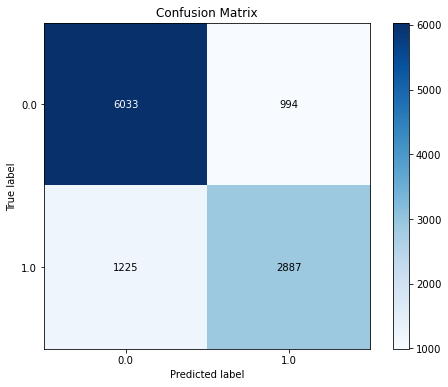

리포트:
               precision    recall  f1-score   support

         0.0       0.83      0.86      0.84      7027
         1.0       0.74      0.70      0.72      4112

    accuracy                           0.80     11139
   macro avg       0.79      0.78      0.78     11139
weighted avg       0.80      0.80      0.80     11139



In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

estimator = RandomForestClassifier()
model = GridSearchCV(estimator, param_grid=bestparams, cv=3, verbose=1, n_jobs=-1, refit=True)
# verbose 출력 실행 모듈
model.fit(X_train,y_train)

pred = model.predict(X_train)
accuracy_score(y_train,pred)
print("*"*10)
pred_test = model.predict(X_test)
accuracy_score(y_test,pred_test)

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

0.8019570877098483

confusion_matrix : 
 [[6022 1005]
 [1201 2911]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

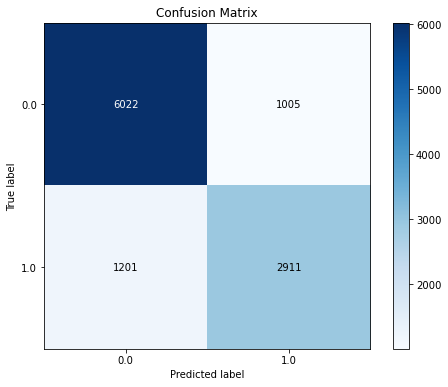

오차행렬:
 [[6022 1005]
 [1201 2911]]
정밀도: 0.7433605720122574
TP/(FP + TP): 0.7433605720122574
재현율: 0.7079280155642024
F1-스코어: 0.7252117588440458
0.7252117588440458
0.7252117588440458
roc_auc: 0.7824541173594457
리포트:
               precision    recall  f1-score   support

         0.0       0.83      0.86      0.85      7027
         1.0       0.74      0.71      0.73      4112

    accuracy                           0.80     11139
   macro avg       0.79      0.78      0.79     11139
weighted avg       0.80      0.80      0.80     11139



In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


model = RandomForestClassifier(criterion = 'entropy', max_features = 'auto', min_samples_split = 5)
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred) 
acc 

from sklearn.metrics import confusion_matrix 
import scikitplot as skplt 
pred = model.predict(X_test) # 실제 , 예측 
cm = confusion_matrix(y_test, pred) 
print('confusion_matrix : \n', cm) 
skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6)) 
plt.show()

# 오차 행렬
confusion = confusion_matrix(y_test,pred)
print('오차행렬:\n',confusion)
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

# 정밀도(precsion) : 레이블이 반드시 숫자 (0,1)여야 함 
precision = precision_score(y_test,pred)
print('정밀도:',precision)
print('TP/(FP + TP):',TP/(FP + TP))
    

# 재현율(recall)
recall = recall_score(y_test,pred)
print('재현율:',recall)
    
# f1_score
f1 = f1_score(y_test,pred)
print('F1-스코어:',f1)
print(2/((1/recall) + (1/precision)))
print(2*(recall*precision)/(recall+precision))
    
# roc_auc
roc_auc = roc_auc_score(y_test,pred)
print('roc_auc:',roc_auc)
    
cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

### XGBoost

In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import xgboost as xgb
import pandas as pd
import seaborn as sns

estimator = xgb.XGBClassifier(early_stopping_rounds=10)
eval_set = [(X_test, y_test)]
estimator.fit(X_train, y_train, eval_set=eval_set, verbose=False)

pred = estimator.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

booster =['gbtree']
max_depth_list =  np.arange(2, 20)
gamma_list = ['scale','auto']     
       

parameter={
    'booster' : booster,
    'max_depth' : max_depth_list,
    'gamma' : gamma_list,    
    'random_state': [42]
}

model = GridSearchCV(estimator, param_grid=parameter, cv=3, verbose=1, n_jobs=-1, refit=True)
# verbose 출력 실행 모듈
model.fit(X_train,y_train)

print('best_params : ', model.best_params_)
print('best_score_ : ', model.best_score_)

gc.paramsTocsv(data_name='bloodliver', scaler='StandardScaler', model_name='XGBoost', best_params=model.best_params_, best_score=model.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

0.73893527246611

Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
108 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\msi\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\msi\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py", line 1516, in fit
    self._Booster = train(
  File "C:\Users\msi\AppData\Roaming\Python\Python39\site-packages\

XGBoostError: Invalid Parameter format for min_split_loss expect float but value='scale'

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

0.73893527246611

confusion_matrix : 
 [[5690 1337]
 [1571 2541]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

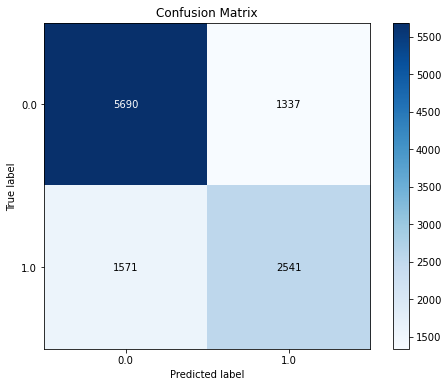

리포트:
               precision    recall  f1-score   support

         0.0       0.78      0.81      0.80      7027
         1.0       0.66      0.62      0.64      4112

    accuracy                           0.74     11139
   macro avg       0.72      0.71      0.72     11139
weighted avg       0.74      0.74      0.74     11139



In [15]:
#XGBoost1
import xgboost as xgb
import pandas as pd
import seaborn as sns


model = xgb.XGBClassifier(early_stopping_rounds=10)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)#, verbose=True

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

96
0.502831824205718


0.5028318259293159

array([0.04835065, 0.04338222, 0.03857255, 0.05113811, 0.05825044,
       0.04877001, 0.04987183, 0.40950012, 0.05510067, 0.04940157,
       0.1476618 ], dtype=float32)

<BarContainer object of 11 artists>

리포트:
               precision    recall  f1-score   support

         0.0       0.78      0.81      0.80      7027
         1.0       0.66      0.62      0.64      4112

    accuracy                           0.74     11139
   macro avg       0.72      0.71      0.72     11139
weighted avg       0.74      0.74      0.74     11139



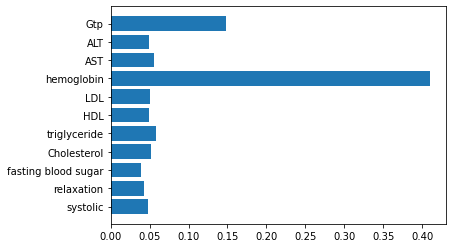

In [16]:
#XGBoost2
# best_iteration
print(model.best_iteration)
print(model.best_score)

from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

# feature_importances_
import matplotlib.pyplot as plt 
model.feature_importances_
plt.barh(df.iloc[:,:-1].columns, model.feature_importances_)

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

### LGBMClassifier

[1]	valid_0's binary_logloss: 0.637095
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.619578
[3]	valid_0's binary_logloss: 0.60506
[4]	valid_0's binary_logloss: 0.592741
[5]	valid_0's binary_logloss: 0.582408
[6]	valid_0's binary_logloss: 0.573445
[7]	valid_0's binary_logloss: 0.566007
[8]	valid_0's binary_logloss: 0.559685
[9]	valid_0's binary_logloss: 0.55412
[10]	valid_0's binary_logloss: 0.549359
[11]	valid_0's binary_logloss: 0.545162
[12]	valid_0's binary_logloss: 0.541631
[13]	valid_0's binary_logloss: 0.538549
[14]	valid_0's binary_logloss: 0.53596
[15]	valid_0's binary_logloss: 0.533843
[16]	valid_0's binary_logloss: 0.53172
[17]	valid_0's binary_logloss: 0.529999
[18]	valid_0's binary_logloss: 0.528452
[19]	valid_0's binary_logloss: 0.52698
[20]	valid_0's binary_logloss: 0.525733
[21]	valid_0's binary_logloss: 0.524642
[22]	valid_0's binary_logloss: 0.523893
[23]	valid_0's binary_logloss: 0.522702
[24]	valid_0's binary_logloss: 0.

LGBMClassifier(boosting_type='goss', max_depth=5, random_state=0)

0.7237633539815064

confusion_matrix : 
 [[5610 1417]
 [1660 2452]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

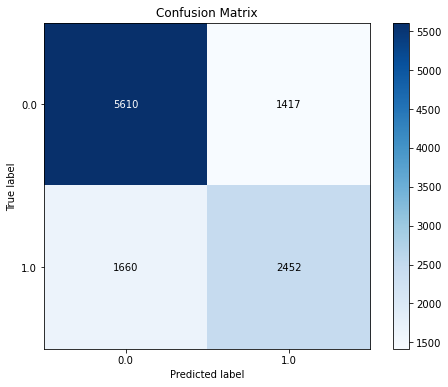

리포트:
               precision    recall  f1-score   support

         0.0       0.77      0.80      0.78      7027
         1.0       0.63      0.60      0.61      4112

    accuracy                           0.72     11139
   macro avg       0.70      0.70      0.70     11139
weighted avg       0.72      0.72      0.72     11139



In [17]:
import lightgbm as lgb # 분류 회귀 다 됨
model = lgb.LGBMClassifier(boosting_type='goss',max_depth=5, random_state=0)
eval_set = [(X_test, y_test)]
callbacks = []  # 리스트 객체 사용자함수를 담을 곳
callbacks.append(lgb.early_stopping(stopping_rounds=10)) # 부스팅 반복 횟수 제어
callbacks.append(lgb.log_evaluation())
model.fit(X_train, y_train, eval_set=eval_set, callbacks=callbacks)

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

In [ ]:
from sklearn.model_selection import GridSearchCV
from MyModule import girdcvconv as gc

estimator = LGBMClassifier(n_jobs=-1, reg_alpha=0.9, reg_lambda=0.2)

 
#splitter_list =  ['best','random']
max_depth_list =  np.arange(10, 15)
max_features_list = ['auto', 'sqrt', 'log2']
min_samples_split_list = np.arange(2, 20)                                   # 노드 분할 위한 최소 표본수 작으면 과적합, 반대의 경우 과소적합
min_weight_fraction_leaf_list =  np.append(0.0,np.arange(0.1, 0.5, 0.1))    # 비율 커지면 과대적합 줄어듬 0,5보다 작게 해야한다
min_impurity_decrease_list = np.append(0.0,np.arange(0.3, 0.5, 0.1))        # 비율 노드분할 관련

parameter={
    'max_features' : max_features_list,
    'max_depth' : max_depth_list
    'min_samples_split' : min_samples_split_list,
    'min_weight_fraction_leaf' : min_weight_fraction_leaf_list,    
    'min_impurity_decrease' :min_impurity_decrease_list,
    'random_state':[42]

}

model = GridSearchCV(estimator, param_grid=parameter, cv=3, verbose=1, n_jobs=-1, refit=True)
# verbose 출력 실행 모듈
model.fit(X_train,y_train)

print('best_params : ', model.best_params_)
print('best_score_ : ', model.best_score_)

gc.paramsTocsv(data_name='bloodliver', scaler='StandardScaler', model_name='RandomForestClassifierr', best_params=model.best_params_, best_score=model.best_score_)

In [171]:
print(model.best_iteration_)
print(model.best_score_)

97
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('binary_logloss', 0.4557287150523791)])})


In [172]:
from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

0.4557287150523791

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

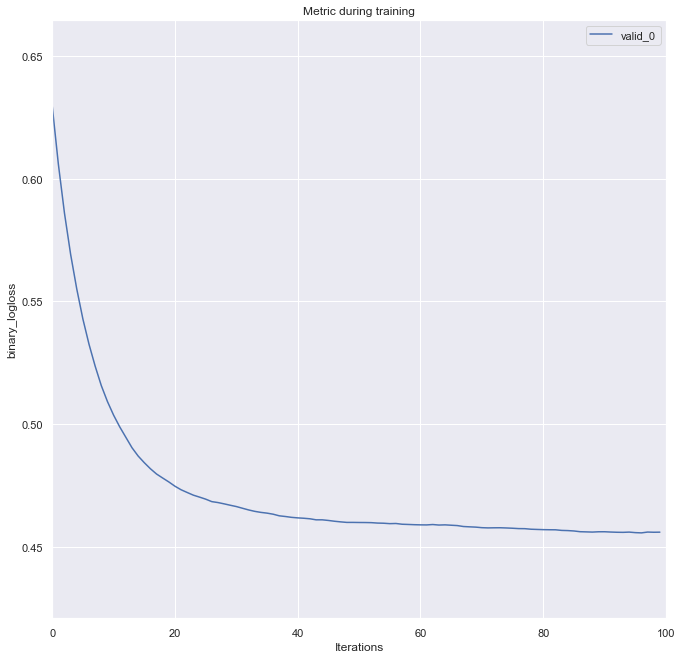

In [173]:
lgb.plot_metric(model)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

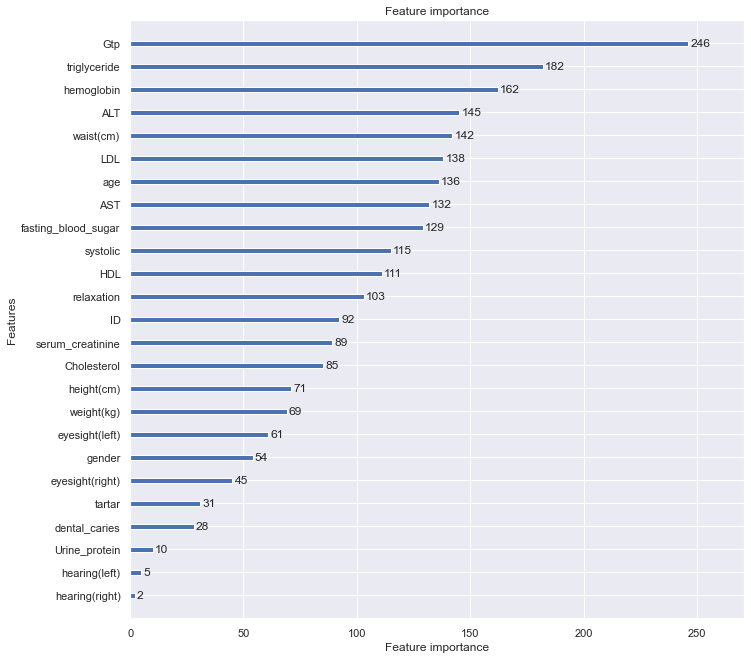

In [174]:
lgb.plot_importance(model)

### Logistic Regression

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(max_iter = 10000)

model2.fit(X_train,y_train)

import joblib
joblib.dump(model2, 'MINIproject')

model2.score(X_test,y_test)
pred_2 = model2.predict(X_test)
acc2 = accuracy_score(y_test,pred_2)
acc2

# 실제 , 예측
cm_2 = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm_2)

skplt.metrics.plot_confusion_matrix(y_test,pred_2,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

In [14]:
#별도 파일에 했음

### Support Vector Machine

In [ ]:
### 모델 - svm ###
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
model = svm.SVC()

kernel_list = ['rbf']
C_list = [1]
gamma_list = [0.3]

param = {'kernel' : kernel_list , 'C' : C_list, 'gamma':gamma_list}

model = GridSearchCV(model, param, cv=5,n_jobs=-1)
model.fit(X_train, y_train)

# 결과 확인
print('best_params : ', model.best_params_)
print('best_score_ : ', model.best_score_)


# pred = model.predict(X_test)
# acc = accuracy_score(y_test, pred) 
# acc 

# from sklearn.metrics import confusion_matrix 
# import scikitplot as skplt 

# pred = model.predict(X_test) # 실제 , 예측 
# cm = confusion_matrix(y_test, pred) 
# print('confusion_matrix : \n', cm) 
# skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6)) 
# plt.show()


In [6]:
# df01
# df02
# df03

# df04 = pd.concat([df01,df02,df03],axis=1)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = \
# train_test_split(df04.iloc[:,:-1], df04.iloc[:,-1], test_size=0.2, random_state=42)


# # 비만 
# X_train_sersea = X_train.iloc[13:,:-1]
# X_test = X_test
# y_train = y_train.iloc[13:,:-1]
# y_test = y_test